Instructions:
1. Choose a unique dataset from: https://archive.ics.uci.edu
2. Your dataset should be unique from your classmates otherwise no points will be given for this exercise.
### Complete the Tasks in bold

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
maternal_health_risk = fetch_ucirepo(id=863) 
  
# data (as pandas dataframes) 
X = maternal_health_risk.data.features 
y = maternal_health_risk.data.targets 
  
# metadata 
print(maternal_health_risk.metadata) 
  
# variable information 
print(maternal_health_risk.variables) 


{'uci_id': 863, 'name': 'Maternal Health Risk', 'repository_url': 'https://archive.ics.uci.edu/dataset/863/maternal+health+risk', 'data_url': 'https://archive.ics.uci.edu/static/public/863/data.csv', 'abstract': 'Data has been collected from different hospitals, community clinics, maternal health cares from the rural areas of Bangladesh through the IoT based risk monitoring system.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1013, 'num_features': 6, 'feature_types': ['Real', 'Integer'], 'demographics': ['Age'], 'target_col': ['RiskLevel'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DP5D', 'creators': ['Marzia Ahmed'], 'intro_paper': {'title': 'Review and Analysis of Risk Factor of Maternal Health in Remote Area Using the Internet of Things (IoT)', 'authors': 'Marzia Ahmed, M. A. Kashem,

## Data Exploration

**TASK: Create a correlation heatmap.**

**TASK: What are the top 5 correlated frequencies with the target\label?**

*Note: You many need to map the label to 0s and 1s.*

*Additional Note: We're looking for **absolute** correlation values.*

{'uci_id': 863, 'name': 'Maternal Health Risk', 'repository_url': 'https://archive.ics.uci.edu/dataset/863/maternal+health+risk', 'data_url': 'https://archive.ics.uci.edu/static/public/863/data.csv', 'abstract': 'Data has been collected from different hospitals, community clinics, maternal health cares from the rural areas of Bangladesh through the IoT based risk monitoring system.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1013, 'num_features': 6, 'feature_types': ['Real', 'Integer'], 'demographics': ['Age'], 'target_col': ['RiskLevel'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DP5D', 'creators': ['Marzia Ahmed'], 'intro_paper': {'title': 'Review and Analysis of Risk Factor of Maternal Health in Remote Area Using the Internet of Things (IoT)', 'authors': 'Marzia Ahmed, M. A. Kashem,

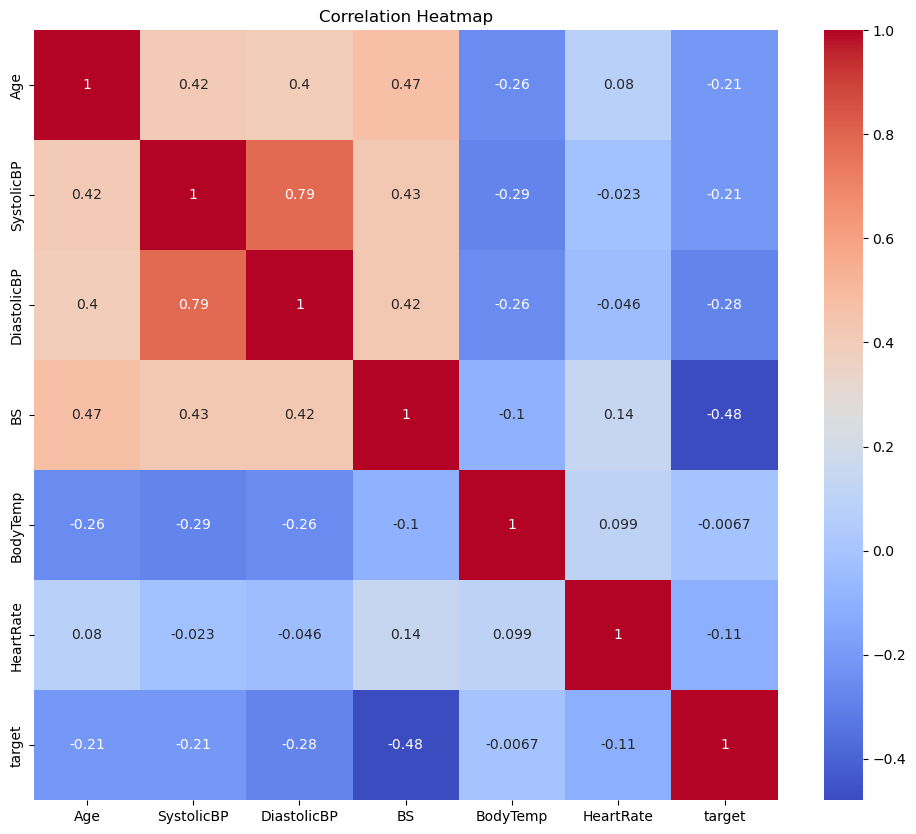


Top 5 features with highest absolute correlation with the target:
BS             0.479958
DiastolicBP    0.284633
Age            0.211851
SystolicBP     0.208797
HeartRate      0.111637
Name: target, dtype: float64


In [3]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Fetch the dataset
maternal_health_risk = fetch_ucirepo(id=863)

# Print metadata and variable information
print(maternal_health_risk.metadata)

# Convert data to pandas dataframes
X = pd.DataFrame(maternal_health_risk.data.features, columns=maternal_health_risk.metadata.feature_names)
y = pd.DataFrame(maternal_health_risk.data.targets, columns=maternal_health_risk.metadata.target_names)

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y.squeeze())

# Combine features and target into a single dataframe
data = pd.concat([X, pd.Series(y, name='target')], axis=1)

# Create a correlation heatmap
corr = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Find the top 5 features with highest absolute correlation with the target
abs_corr = abs(corr['target']).drop('target')
top_corr_features = abs_corr.sort_values(ascending=False)[:5]
print(f"\nTop 5 features with highest absolute correlation with the target:")
print(top_corr_features)

## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: Do not forget to put a random_state for reproducibility.*

In [4]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Fetch the dataset
maternal_health_risk = fetch_ucirepo(id=863)

# Convert data to pandas dataframes
X = pd.DataFrame(maternal_health_risk.data.features, columns=maternal_health_risk.metadata.feature_names)
y = pd.DataFrame(maternal_health_risk.data.targets, columns=maternal_health_risk.metadata.target_names)

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y.squeeze())

# Split the data into features and labels
X_features = X
y_labels = y

# Split the data into a training set (90%) and a test set (10%)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.1, random_state=42)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(912, 6), y_train=(912,)
Test set shape: X_test=(102, 6), y_test=(102,)


**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline with StandardScaler and KNN model
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Print the pipeline steps
print(knn_pipeline.steps)

[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]


**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [6]:
from sklearn.model_selection import GridSearchCV

# Create a parameter grid for KNN
param_grid = {'knn__n_neighbors': range(1, 21)}

# Create a grid search object with the pipeline
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search object on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'knn__n_neighbors': 1}
Best Score:  0.8267699513601153


**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

In [7]:
import matplotlib.pyplot as plt

# Get the mean test scores for each value of k
mean_scores = grid_search.cv_results_['mean_test_score']

# Get the values of k that were evaluated
k_values = grid_search.cv_results_['param_knn__n_neighbors'].data

# Plot the mean test scores against the values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Test Score')
plt.title('K-Nearest Neighbors: Mean Test Score vs. K')
plt.xticks(k_values)
plt.show()

TypeError: loop of ufunc does not support argument 0 of type float which has no callable rint method

Error in callback <function _draw_all_if_interactive at 0x00000236E56A2840> (for post_execute):


TypeError: loop of ufunc does not support argument 0 of type float which has no callable rint method

TypeError: loop of ufunc does not support argument 0 of type float which has no callable rint method

<Figure size 1000x600 with 1 Axes>

### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_estimator.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.96      0.87        27
           1       0.90      0.65      0.75        40
           2       0.78      0.89      0.83        35

    accuracy                           0.81       102
   macro avg       0.82      0.83      0.82       102
weighted avg       0.83      0.81      0.81       102


Confusion Matrix:
[[26  1  0]
 [ 5 26  9]
 [ 2  2 31]]
